<a href="https://colab.research.google.com/github/Syukta8/Final_Assesment_KPT/blob/main/1813723_Assessment1_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessment 1: Deep Learning

1) Answer all questions.
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc.
3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)
4) Upload the answer notebook to your github. 
5) Submit the assessment by sharing the link to your answer notebook. 





**QUESTION 1** 

One day while wandering around a clothing store at KL East Mall, you stumbled upon a pretty girl who is choosing a dress for Hari Raya. It turns out that the girl is visually impaired and had a hard time distinguishing between an abaya and a kebaya. To help people with the similar situation, you then decided to develop an AI system to identify the type of clothes using a Convolutional Neural Networks (ConvNet). In order to train the network, you decide to use the Fashion MNIST dataset which is freely available on Pytorch.


a) Given the problem, what is the most appropriate loss function to use? Justify your answer. **[5 marks]**


<span style="color:blue">
    ANSWER: nn.CrossEntropyLoss because this loss function already include nn.LogSoftmax function that convert last output from the network as a probability distribution</span>

b) Create and train a ConvNet corresponding to the following CNN architecture (with a modification of the final layer to address the number of classes). Please include **[10 marks]**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

    

<div>
<img src="https://vitalflux.com/wp-content/uploads/2021/11/VGG16-CNN-Architecture.png" width="550"/>
</div>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 3 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy
import random

from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchsummary import summary

# Applying Transforms to the Data
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Q1)data loader
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.Resize(size=224),
     transforms.ToTensor(),
     transforms.Normalize([0.485],
                             [0.229])])

batch_size = 10

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

60000
10000


In [ ]:
# Q2) custom model
class Fashion(nn.Module):
    def __init__(self, num_classes=10):
        super(Fashion, self).__init__()
        self.in_channels = 1
        self.num_classes = num_classes
        # convolutional layers 
        self.conv_layers = nn.Sequential(
            nn.Conv2d(self.in_channels, 64, kernel_size=3, padding=1),  #1
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),               #2
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),              #3
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),              #4
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),              #5
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # fully connected linear layers
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=1000),
            nn.ReLU(),
            nn.Linear(in_features=1000, out_features=self.num_classes)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        # flatten to prepare for the fully connected layers
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

model = Fashion()

# LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Fashion(
  (conv_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=25088, out_fe

In [ ]:
#training setting
import time # to calculate training time

def train_and_validate(model, loss_criterion, optimizer, epochs):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(trainloader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(testloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_test_loss = valid_loss/test_data_size 
        avg_test_acc = valid_acc/test_data_size

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_test_loss, avg_test_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model,'model_'+str(epoch)+'.pt')
            
    return model, history

In [ ]:
# Q3)training loop
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 0.4286, Accuracy: 84.3267%, 
		Validation : Loss : 0.3819, Accuracy: 86.6100%, Time: 549.6549s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.2723, Accuracy: 90.1933%, 
		Validation : Loss : 0.2810, Accuracy: 89.8100%, Time: 549.2913s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.2320, Accuracy: 91.5117%, 
		Validation : Loss : 0.2728, Accuracy: 90.5800%, Time: 548.4911s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.2098, Accuracy: 92.2917%, 
		Validation : Loss : 0.2658, Accuracy: 91.2100%, Time: 548.4208s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.1895, Accuracy: 93.0500%, 
		Validation : Loss : 0.2594, Accuracy: 91.1900%, Time: 550.8401s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1759, Accuracy: 93.6233%, 
		Validation : Loss : 0.2854, Accuracy: 90.7300%, Time: 548.9603s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1616, Accuracy: 94.1017%, 
		Validation : Loss : 0.2725, Accuracy: 91.2900%, Time: 548.5425s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1512,

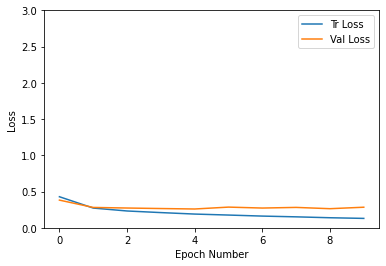

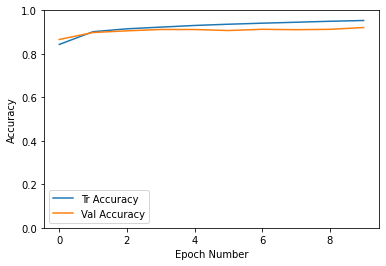

In [ ]:
# Q4) mean accuracy
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,3)
plt.show()

plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

c) Replace your defined CNN in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the Fashion MNIST dataset. **[10 marks]**

In [ ]:
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.Resize(size=224),
     transforms.ToTensor(),
     transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
     transforms.Normalize([0.485],
                             [0.229])])

batch_size = 10

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

60000
10000


In [ ]:
model = torchvision.models.resnet18(pretrained=True)
print(model)
for param in model.parameters():
    param.requires_grad = False

#Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
print(num_ftrs)
model.fc = nn.Sequential(nn.Linear((num_ftrs),len(classes)))

# LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)

model = model.to(device)
torch.cuda.empty_cache()

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 1.2205, Accuracy: 74.9683%, 
		Validation : Loss : 0.9543, Accuracy: 80.8200%, Time: 129.3775s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.1542, Accuracy: 77.9450%, 
		Validation : Loss : 0.8433, Accuracy: 82.7200%, Time: 126.9598s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.1380, Accuracy: 78.6650%, 
		Validation : Loss : 0.9716, Accuracy: 81.4800%, Time: 127.7313s
Epoch: 4/10
Epoch : 003, Training: Loss: 1.1405, Accuracy: 78.9533%, 
		Validation : Loss : 0.9370, Accuracy: 82.1800%, Time: 126.8879s
Epoch: 5/10
Epoch : 004, Training: Loss: 1.1324, Accuracy: 79.0117%, 
		Validation : Loss : 1.0584, Accuracy: 82.2900%, Time: 125.2217s
Epoch: 6/10
Epoch : 005, Training: Loss: 1.1309, Accuracy: 79.1767%, 
		Validation : Loss : 1.0602, Accuracy: 83.1300%, Time: 126.6222s
Epoch: 7/10
Epoch : 006, Training: Loss: 1.1595, Accuracy: 79.1850%, 
		Validation : Loss : 0.8422, Accuracy: 83.8300%, Time: 127.3040s
Epoch: 8/10
Epoch : 007, Training: Loss: 1.1569,

d) Using model-centric methods, propose two (2) strategies that can be used to increase the accuracy of the model on the testing dataset. **[5 marks]**


<span style="color:blue">
    Two model-centric techniques that I propose are: use dropout, use different optimizer value. </span>

e) Next, implement the two proposed model-centric techniques for the same problem as in the previous question. **[15 marks]**

In [ ]:
model = torchvision.models.resnet18(pretrained=True)
print(model)
for param in model.parameters():
    param.requires_grad = False

#Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
print(num_ftrs)
model.fc = nn.Sequential(nn.Linear(num_ftrs, (num_ftrs//2)),nn.ReLU(),
                         nn.Dropout(0.5), nn.Linear((num_ftrs//2), (num_ftrs//4)), nn.ReLU(),
                         nn.Dropout(0.5), nn.Linear((num_ftrs//4), (num_ftrs//8)), nn.ReLU(),
                         nn.Linear((num_ftrs//8), (num_ftrs//16)), nn.ReLU(),
                         nn.Linear((num_ftrs//16),len(classes))
                            )

model = model.to(device)
torch.cuda.empty_cache()

# LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum = 0.9)

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

Epoch: 1/10
Epoch : 000, Training: Loss: 1.3691, Accuracy: 47.1450%, 
		Validation : Loss : 0.6013, Accuracy: 77.0900%, Time: 130.2866s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.7099, Accuracy: 74.3383%, 
		Validation : Loss : 0.5016, Accuracy: 82.5700%, Time: 129.7602s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.6317, Accuracy: 77.8650%, 
		Validation : Loss : 0.4472, Accuracy: 83.9300%, Time: 129.6090s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.5897, Accuracy: 79.4933%, 
		Validation : Loss : 0.4341, Accuracy: 84.3100%, Time: 129.0247s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.5610, Accuracy: 80.1583%, 
		Validation : Loss : 0.4377, Accuracy: 84.2800%, Time: 131.0773s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.5413, Accuracy: 81.1700%, 
		Validation : Loss : 0.4081, Accuracy: 85.1500%, Time: 131.8496s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.5274, Accuracy: 81.6583%, 
		Validation : Loss : 0.4068, Accuracy: 85.3100%, Time: 129.4008s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.5137,

f) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **[5 marks]**

<span style="color:blue">
    the system model learn from the data despite the size, position and allignment. When adding the noise, it will adjust the value of the training acording to previous model so the model become more robust and able to detect the image</span>

g) In real applications, data-centric strategies are essential to train robust deep learning models. Give two (2) examples of such strategies and discuss how the strategies helps improving the model accuracy. **[5 marks]**

<span style="color:blue">
    Example: random flip, random perspective. When we input the some noise in same dataset, we help the training model to distinguih between the desired object and other non-desireable object. Rather than gathering more data, altering the data is better to train model to work on noisy data. </span>

h) Next, implement the two proposed data-centric techniques for the same problem as in the previous question. **[10 marks]**

In [ ]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy
import random

from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchsummary import summary

# Applying Transforms to the Data
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
transform = transforms.Compose(
    [transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x),
     transforms.Resize(size=150),
     transforms.RandomResizedCrop(size=130, scale=(0.8, 1.0)),
     transforms.RandomRotation(degrees=15),
     transforms.RandomPerspective(p=0.5),
     transforms.CenterCrop(size=128),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])])

batch_size = 10

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_data_size = len(trainloader.dataset)
test_data_size = len(testloader.dataset)

print(train_data_size)
print(test_data_size)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

60000
10000


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model = torchvision.models.resnet18(pretrained=True)
print(model)
for param in model.parameters():
    param.requires_grad = False

#Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
print(num_ftrs)
model.fc = nn.Sequential(nn.Linear(num_ftrs, (num_ftrs//2)),nn.ReLU(),
                         nn.Dropout(0.5), nn.Linear((num_ftrs//2), (num_ftrs//4)), nn.ReLU(),
                         nn.Dropout(0.5), nn.Linear((num_ftrs//4), (num_ftrs//8)), nn.ReLU(),
                         nn.Linear((num_ftrs//8), (num_ftrs//16)), nn.ReLU(),
                         nn.Linear((num_ftrs//16),len(classes))
                            )

model = model.to(device)
torch.cuda.empty_cache()

# LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum = 0.9)

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, criterion, optimizer, num_epochs)

**QUESTION 2** **[35 marks]**

Firstly, watch this video:

https://drive.google.com/file/d/1bsypahR7I3f_R3DXkfw_tf0BrbCHxE_O/view?usp=sharing

This video shows an example of masked face recognition where the deep learning model is able to detect and classify your face even when wearing a face mask. Using the end-to-end object detection pipeline that you have learned, develop your own masked face recognition such that the model should recognize your face even on face mask while recognize other persons as "others".

Deliverables for this question are:

- the model file. Change the name to <your_name>.pt file (e.g. hasan.pt).
- a short video (~10 secs) containing your face and your friends faces (for inference).